# ICS 235 Homework Assignment 5
# <span style="color:red">Due: 11:55 PM on Wednesday, December 4</span>

## Instructions

1. Name your notebook file using your last and first name as presented in Laulima.
    - For example, Harry, Potter ==> HarryPotter_5.ipynb (The number at the end is the assignment number.)
2. Only use .ipynb file extensions. Other extensions (file formats) like .rtf, .zip, .docs, .pdf are not accepted.
3. Data files will be available to the instructor, so no need to upload them to Laulima. Make sure you use the same filenames of data files as given in the homework.
4. Save data files in **"data" folder under your working directory**. Use **relative path** when you read in data in your code.
5. Do not create any subfolders in your Drop Box.
6. **Do not modify or delete the provided code unless instructed to do so.**
7. Clean your code before submission.
    - If needed, provide clear documentation describing the purpose and how to use every class or function in your code.
    - Your submission should **show only the required outputs**. 
8. Run your code before submission to **show all outputs in the submitted file**. 
10. Write your full name in the cell below.
***

## Your Name: Anne Dominique Malig
***

# Exercise 1: Naive Bayes Classifier (68 points)

In this exercise, we will do some simple sentiment analysis on IMDB movie reviews. Given each viewer's comments, the goal is to determine whether the viewer had a positive or negative feeling about the movie.

## Loading the data

In [55]:
import pandas as pd

data = pd.read_csv("data/imdb.csv")

# Sample 10,000 at random for speed purposes
data = data.sample(10000, random_state=42)

data.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


1. 1. Store the feature and target values in X and y respectively. (3 points)
   2. Split the data into **training (70%), testing (20%), and validation (10%)**. Use a **random state of 42** for both splits. (3 points)

In [56]:
# YOUR CODE

# 1.A

X = data["review"]
y = data["sentiment"]

# 1.B
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size = 0.7, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 1/3, random_state = 42)


2. Encode the features using the TF-IDF encoding scheme. In this exercise, we will limit the number of features to 500 for speed purposes. (See tf-idf [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for more details about how to limit the number of features.) (7 points)

In [57]:
# YOUR CODE

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 500)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)
X_val_tfidf = vectorizer.transform(X_val)

3. 1. Implement a **random guess function** based on the **uniform distribution** to predict the sentiment. This will be our baseline for comparison with other predictive algorithms. (Do **NOT** use the `DummyClassifier` class. **Implement your own function.**) (6 points)
   2. Build a Naive Bayes classifier to predict the sentiment using the TF-IDF features from Question 2. (4 points)
   3. Choose one other classification algorithm of your choice for comparison with the Naive Bayes classifier. Make sure the algorithm can provide probabilities for each class. (4 points)
   4. For each of the three algorithms, compute the class probabilities of the validation set and store it in a dictionary. (The keys should be the algorithm name and the values are the **probability of the sentiment being positive**.) (6 points)

In [58]:
# YOUR CODE

# 3.A

import numpy as np

def random_guess_predict(X):
    predictions = np.random.randint(0, 2, size = len(X))
    return predictions

y_test_pred_random = random_guess_predict(X_test)
y_val_pred_random = random_guess_predict(X_val)


# 3.B

from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()

mnb_clf.fit(X_train_tfidf, y_train)

y_test_pred_mnb = mnb_clf.predict(X_test_tfidf)
y_val_pred_mnb = mnb_clf.predict(X_val_tfidf)


# 3.C

from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(max_iter = 1000, random_state = 42)

logreg_clf.fit(X_train_tfidf, y_train)

y_test_pred_logreg = logreg_clf.predict(X_test_tfidf)
y_val_pred_logreg = logreg_clf.predict(X_val_tfidf)

# 3.D

probs_dict = {}

random_probs = random_guess_predict(X_val)
probs_dict['Random Guess'] = random_probs

mnb_probs = mnb_clf.predict_proba(X_val_tfidf)[:, 1]
probs_dict['Naive Bayes'] = mnb_probs

log_reg_probs = logreg_clf.predict_proba(X_val_tfidf)[:, 1]
probs_dict['Logistic Regression'] = log_reg_probs


4. 1. Build and evaluate the convergence speed (# of epochs) and accuracy of a neural network classifier on the validation set with varying values of the learning rate (`[1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1, 10]`). Print the accuracy and the number of epochs for each learning rate. In your implementation, keep the default hyperparameter of the MLPClassifier, except for the following: (8 points)
      - `early_stopping` = True
      - `solver` = 'sgd'
      - `random_state` = 42   
   2. What is the best learning rate? Explain. (4 points)
   3. Why does the accuracy drop when the learning rate is 10? (4 points)
   4. Compute the class probabilities of the validation set for the best network (the network trained with the best learning rate found in Question B, and the same hyperparameters as in Question A) and add it to the dictionary that you created in Question 3 above. (Use "mlp" as the key.) The values are the **probability of the sentiment being positive**. (4 points)

In [59]:
# YOUR CODE 

# 4.A

from sklearn.neural_network import MLPClassifier

learning_rates = [1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1, 10]

for learning_rate in learning_rates:
    mlp_clf = MLPClassifier(learning_rate_init = learning_rate, early_stopping = True, solver = 'sgd', random_state = 42)

    mlp_clf.fit(X_train_tfidf, y_train)
    epochs = mlp_clf.n_iter_
    y_val_pred = mlp_clf.predict(X_val_tfidf)
    accuracy = mlp_clf.score(X_val_tfidf, y_val)

    print(f'Learning Rate: {learning_rate}')
    print(f'Accuracy: {accuracy}')
    print(f'Epochs to Convergence: {epochs}')

# 4.D

mlp_clf = MLPClassifier(learning_rate_init = 0.1, early_stopping = True, solver = 'sgd', random_state = 42)
mlp_clf.fit(X_train_tfidf, y_train)

mlp_probs = mlp_clf.predict_proba(X_val_tfidf)[:, 1]
probs_dict['mlp'] = mlp_probs


Learning Rate: 0.0001
Accuracy: 0.499
Epochs to Convergence: 12


c:\Users\anne0\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Accuracy: 0.769
Epochs to Convergence: 200
Learning Rate: 0.01
Accuracy: 0.808
Epochs to Convergence: 50
Learning Rate: 0.1
Accuracy: 0.822
Epochs to Convergence: 30
Learning Rate: 0.5
Accuracy: 0.821
Epochs to Convergence: 17
Learning Rate: 1
Accuracy: 0.823
Epochs to Convergence: 28
Learning Rate: 10
Accuracy: 0.501
Epochs to Convergence: 12


> **YOUR ANSWER (4.B)**: The best learning rate is 1 with an accuracy of 0.823 with lower number of epoch.
> 

> **YOUR ANSWER (4.C)**: The accuracy drops when the learning rate is 10 because it is way too high; it takes larger steps when performing stochastic gradient descent. Thus, the minimum loss function could be missed.
> 

5. 1. Using the dictionary containing the class probabilities estimated by the four algorithms, draw ROC curves for all four algorithms in a **single plot**. Add a legend indicating the algorithm and the AUC value for each curve. (10 points)
   2. What threshold should we set if we want 80% recall with the Naive Bayes classifier? Show the TPR and FPR for the threshold found. (5 points)

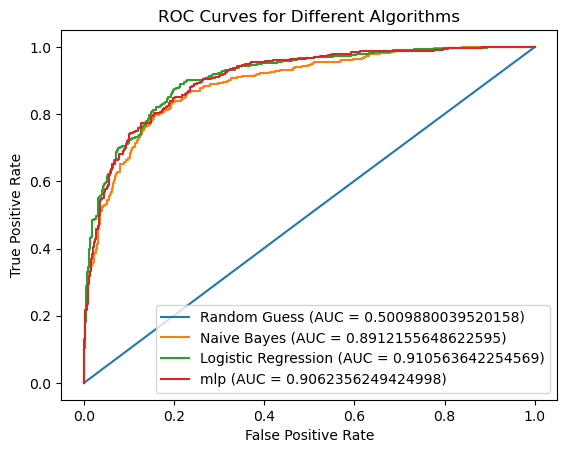

Threshold for 80% recall: 0.516013720544204
TPR at this threshold: 0.8003992015968064
FPR at this threshold: 0.16633266533066132


In [60]:
# YOUR CODE

# 5.A

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

y_val_numeric = [1 if label == 'positive' else 0 for label in y_val]

for algorithm, prob in probs_dict.items():
    fpr, tpr, thresholds = roc_curve(y_val_numeric, prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'{algorithm} (AUC = {auc_score})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Algorithms')
plt.legend()
plt.show()

# 5.B

fpr, tpr, thresholds = roc_curve(y_val_numeric, mnb_probs)

threshold_index = (tpr >= 0.80).argmax()

threshold_80_rec = thresholds[threshold_index]

tpr_80_rec = tpr[threshold_index]
fpr_80_rec = fpr[threshold_index]

print(f"Threshold for 80% recall: {threshold_80_rec}")
print(f"TPR at this threshold: {tpr_80_rec}")
print(f"FPR at this threshold: {fpr_80_rec}")


# Exercise 2: Autoencoder network (32 points)

In this exercise, we are going to re-use the TCGA dataset from homework \#4. We will see that neural network can also solve unsupervised problems. To do so, we are going to implement a simple autoencoder to extract 2 components from our  features (similar to PCA components). An autoencoder network takes as input some features, and tries to predict those same features. The architecture of the network will impose constraints which makes the recovery of the initial values not trivial. In our case, we will use a single hidden layer with 2 neurons: Thus, the network needs to encode the information from about 9,000 selected features into 2 values, and then reconstruct as best as possible the ~9,000 feature values from those 2 values (see figure below). Intuitively, if the network is accurate at reconstructing the original values, then the hidden layer should encode meaningful values about our samples.

<center><img src="autoencoder.png" width="400"></center>

## Loading the data

In [61]:
import pandas as pd

X = pd.read_csv("data/tcga.csv", index_col=0, low_memory=False)
X = X.loc[:, X.std() > 1]    # Filter the data
y = pd.read_csv("data/tcga_labels.csv", index_col=0).Class

1. Standardize the feature matrix. (2 points)

In [62]:
# YOUR CODE

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Apply PCA with 2 principal components to the scaled data and do the scatter plot of the data transformed into the 2D space formed by the first 2 principal components. Color each sample according to their class labels. (6 points)

C:\Users\anne0\AppData\Local\Temp\ipykernel_9232\948316627.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


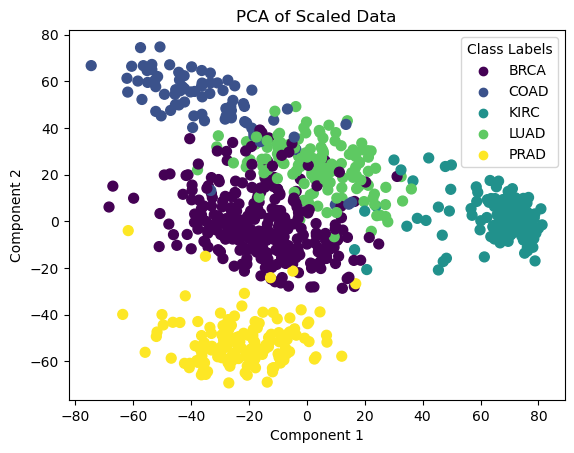

In [63]:
# YOUR CODE

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

pca = PCA(n_components = 2)
pca_scaled = pca.fit_transform(X_scaled)

plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c = y_numeric, cmap = 'viridis', s = 50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Scaled Data')

import matplotlib.cm as cm
import matplotlib.colors as mcolors

cmap = cm.get_cmap('viridis')
norm = mcolors.Normalize(vmin=y_numeric.min(), vmax=y_numeric.max())

labels = []
for i, label in enumerate(label_encoder.classes_):
    color = cmap(norm(i))
    labels.append(plt.scatter([], [], color=color, label=label))
plt.legend(title="Class Labels", handles=labels)
plt.show()

3. 1. Train a regression neural network with a 2-neuron hidden layer on the scaled data. Do not use the target values (y) in the training, but do it in an unsupervised manner as described in the introduction of this exercise. Use the **identity activation function** and a **random state of 42**. (6 points)
   2. How many parameters are fitted with this architecture? (Do not compute it manually. Write a code to calculate it using the attributes of the trained network.) (5 points)

In [64]:
# YOUR CODE

# 3.A

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes = (2,), activation = 'identity', random_state = 42).fit(X_scaled, X_scaled)
mlp_pred = mlp.predict(X_scaled)

# 3.B

coefs = mlp.coefs_
intercepts = mlp.intercepts_

params = 0

for coef, int in zip(coefs, intercepts):
    params += coef.size
    params += int.size
    
print(f'Number of parameters: {params}')

Number of parameters: 46067


4. 1. Compute the hidden representation of each sample. It should be a n_samples-by-2 dimensional array. (7 points)
   2. Plot the 2D representations of the data computed above and color them by their class labels. (4 points)
   3. Compare the 2D representate found by the neural network (plot from Question B) with the representation in the 2D PCA space (plot from Question 2). Are the samples from same class clustered similarly in both representations? (2 points) 

C:\Users\anne0\AppData\Local\Temp\ipykernel_9232\1719204943.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


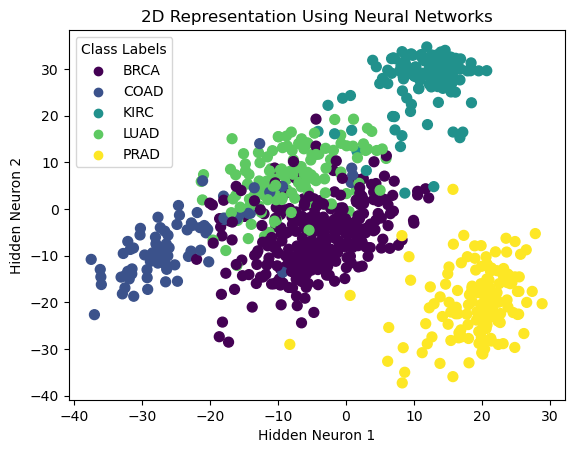

In [65]:
# YOUR CODE

# 4.A
w = mlp.coefs_[0]
b = mlp.intercepts_[0]
hidden_layer_output = np.dot(X_scaled, w) + b

# 4.B

import matplotlib.pyplot as plt

plt.scatter(hidden_layer_output[:, 0], hidden_layer_output[:, 1], c = y_numeric, cmap = 'viridis', s = 50)

plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.title('2D Representation Using Neural Networks')

import matplotlib.cm as cm
import matplotlib.colors as mcolors

cmap = cm.get_cmap('viridis')
norm = mcolors.Normalize(vmin=y_numeric.min(), vmax=y_numeric.max())

labels = []
for i, label in enumerate(label_encoder.classes_):
    color = cmap(norm(i))
    labels.append(plt.scatter([], [], color=color, label=label))
plt.legend(title="Class Labels", handles=labels)
plt.show()


> **YOUR ANSWER (4.C)**: The clusters of the 2D PCA space and the 2D representate found by neural networks are not clustered similarly. It looks like the clusters are shifted and inverted but the cluster sizes are fairly the same.
> 